In [2]:
#matlab, packages 
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (15,10)


## Lab2 Probability, Distributions, and Statistical Questions

#### Question 1
In lecture and homework we explored how the convolution can be used to calculate the probability of a sum or average. For this problem we are going to imagine that we are looking for gamma-ray sources (e.g. with the Fermi telescope). In this kind of telescope there is a background of cosmic-rays (electrons and protons, mostly) that provides a discrete noise term across the sky that precisely follows a Poisson distribution. To detect a gamma-ray source, you need to ask what is the probability that the cosmic-ray background would have given you a measurement as signal-like or more than the signal that you received.

To set up the problem, assume in 1 day the average cosmic-ray background is some number X (pick someting btwn 0.5 and 10, with different values for you and your lab partner); and the average number of gamma-rays emitted by your hypothetical source is Y (pick something larger than X).

1. Show how the probability distribution of the background changes as you integrate (sum) for more days.

2. Show that after 5 days, the summed probability distribution is still a Poisson distribution. Explain why this makes sense from a mathematical and conceptual point of view.

3. Show how the probability distribution evolves as you average days. Calculate for many different ranges of days, and explore the shape of the distribution as the number of days becomes larger. Discuss this in relation to both B) and the central limit theoem.

4. Pick some number of days N, and assume you saw Y*N gamma rays from your source. Calculate the 'sigma' of your observation. 

#### Seting x and y for the gamma ray
x = 1.5; y = 20

In [28]:
x_mu = 1.5
y = 9.

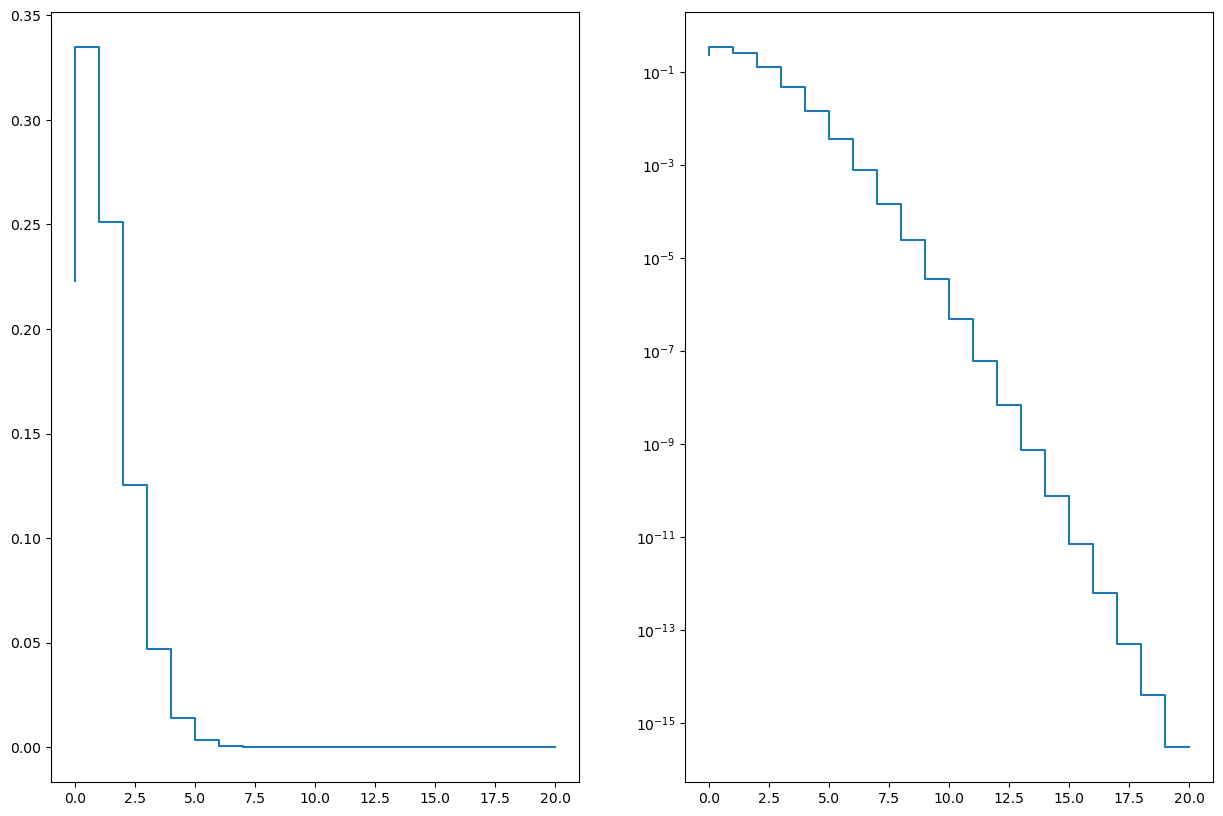

In [4]:
fig, ax = plt.subplots(1,2)
n = 20
mu = 1.5
loc = 0
r_value = list(range(n+1))
#build in function for building a poisson dataset
dist = [stats.poisson.pmf(r, mu,loc) for r in r_value]
#step plot, like stair style plots
ax[0].step(r_value, dist)
ax[1].step(r_value, dist)
plt.yscale("log")

#### Q1.1
Show how the probability distribution of the background changes as you integrate (sum) for 3 days.

In [3]:
dist = [None] * 3
n = 20
mu = 1.5
loc = 0
r_value = list(range(n+1))
for i in range(3):
    numDays = i+1
    #build in function for building a poisson dataset
    dist[i] = [stats.poisson.pmf(r, mu,loc)*numDays for r in r_value]
    

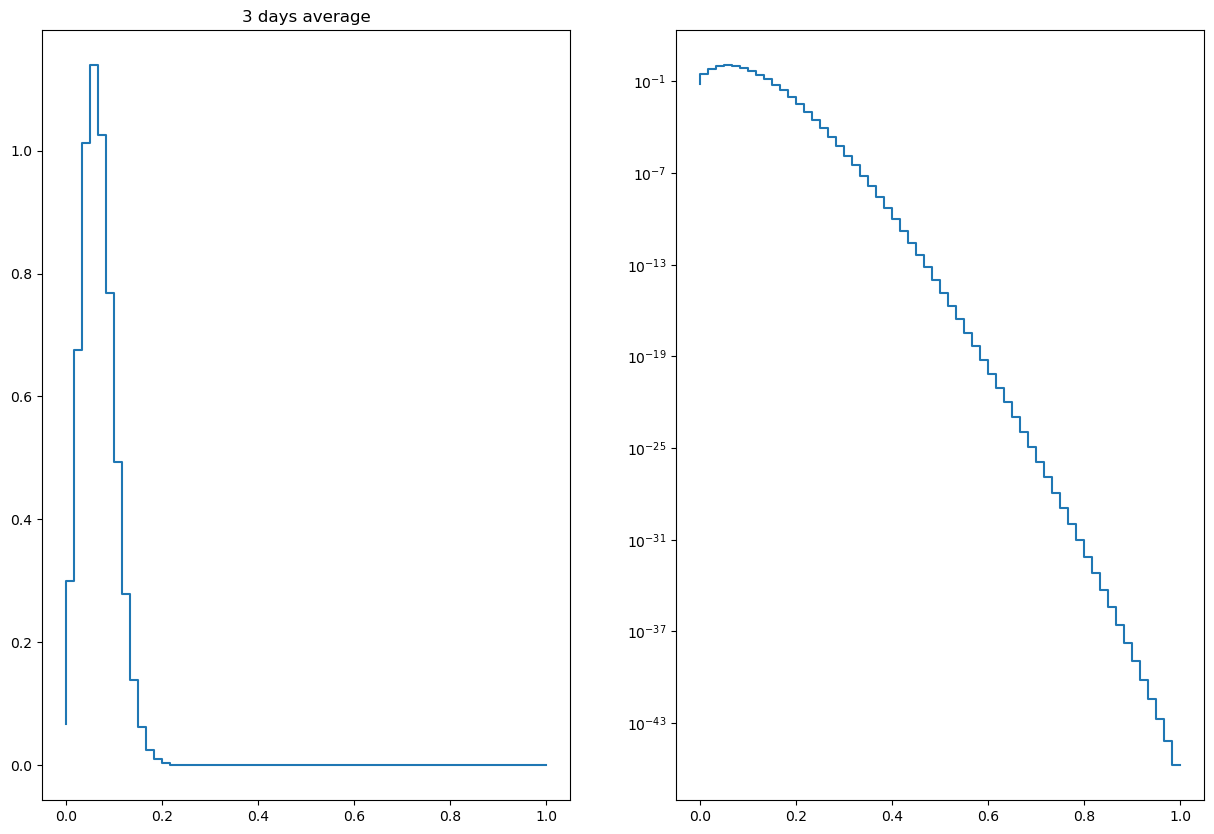

In [7]:
fig, ax = plt.subplots(1,2)
x = np.linspace(0,1,61)
p_con = np.convolve(dist[0], dist[1],'full')
for i in range(1):
    p_con = np.convolve(p_con, dist[i+2],'full')
ax[0].step(x,p_con)
ax[0].set_title('3 days average')
ax[1].step(x, p_con)
plt.yscale("log")

#### Q1.2
Show that after 5 days, the summed probability distribution is still a Poisson distribution. Explain why this makes sense from a mathematical and conceptual point of view.

In [42]:
dist = [None] * 5 
n = 20
mu = 1.5
loc = 0
r_value = list(range(n+1))
for i in range(5):
    
    #build in function for building a poisson dataset
    dist[i] = [stats.poisson.pmf(r, mu,loc) for r in r_value]

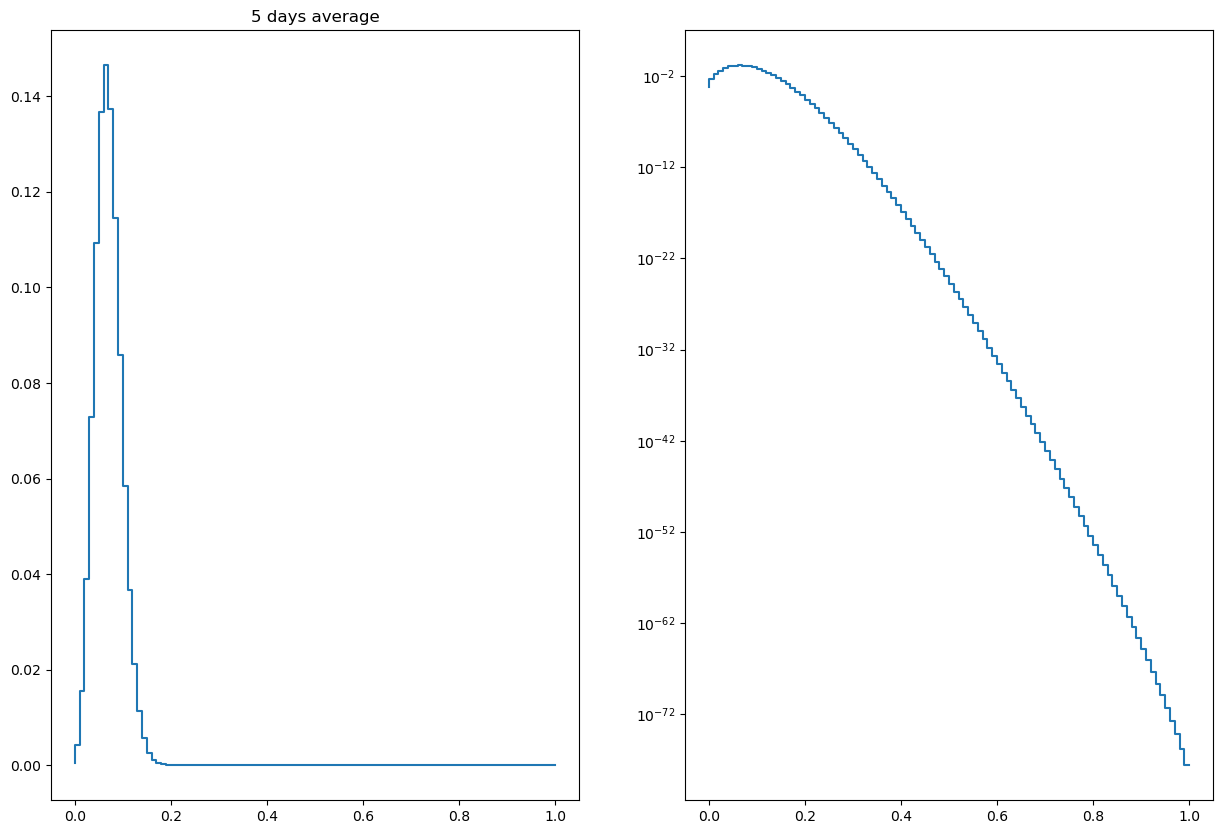

In [43]:
fig, ax = plt.subplots(1,2)
x = np.linspace(0,1,101)
p_con = np.convolve(dist[0], dist[1],'full')
for i in range(3):
    p_con = np.convolve(p_con, dist[i+2],'full')
ax[0].step(x,p_con)
ax[0].set_title('5 days average')
ax[1].step(x,p_con)
plt.yscale('log')

#### Q1.3
Show how the probability distribution evolves as you average days. Calculate for many different ranges of days, and explore the shape of the distribution as the number of days becomes larger. Discuss this in relation to both B) and the central limit theoem.

In [44]:
dist = [None] * 10 
n = 20
mu = 1.5
loc = 0
r_value = list(range(n+1))
for i in range(10):
    
    #build in function for building a poisson dataset
    dist[i] = [stats.poisson.pmf(r, mu,loc) for r in r_value]

Text(0.5, 1.0, '10 days Average')

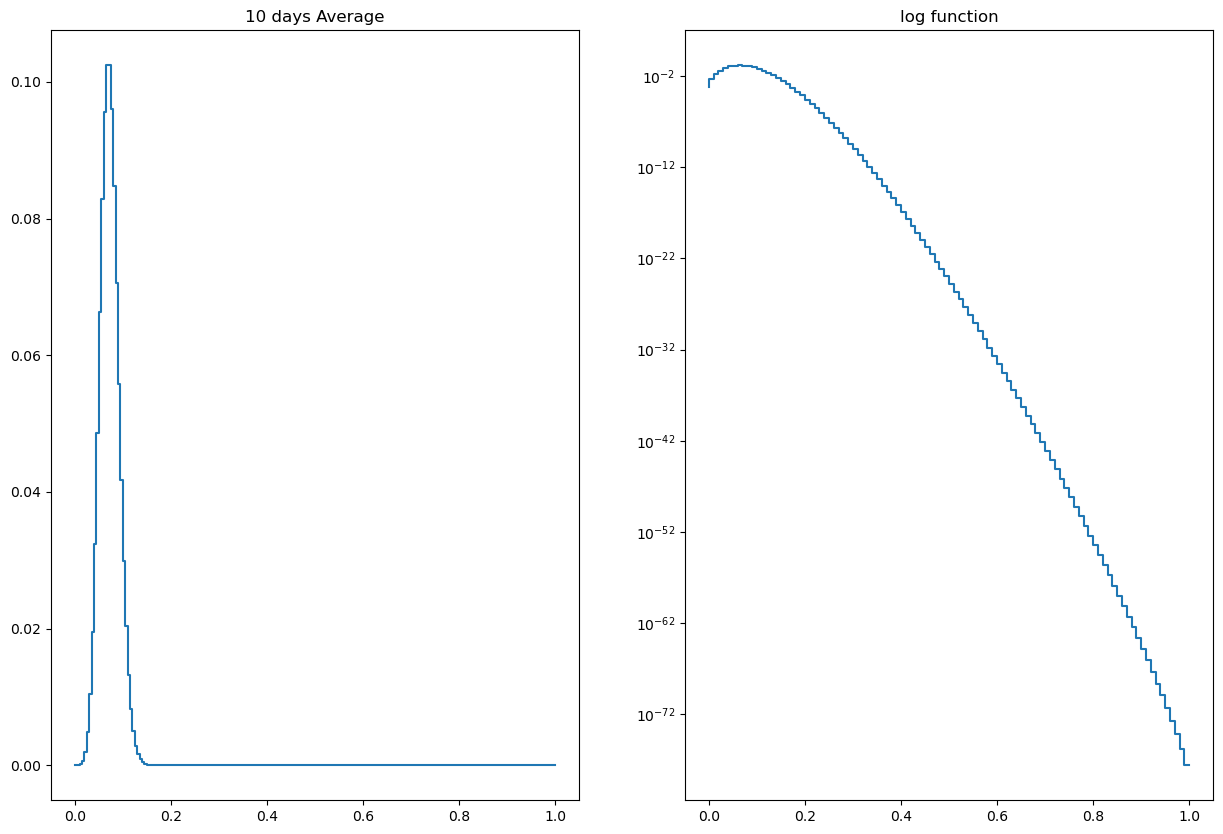

In [45]:
fig, ax = plt.subplots(1,2)
ax[1].step(x,p_con)
plt.yscale('log')
ax[1].set_title('log function')
x = np.linspace(0,1,201)
p_con = np.convolve(dist[0], dist[1],'full')
for i in range(8):
    p_con = np.convolve(p_con, dist[i+2],'full')
ax[0].step(x,p_con)
ax[0].set_title('10 days Average')

Text(0.5, 1.0, '20 days Average')

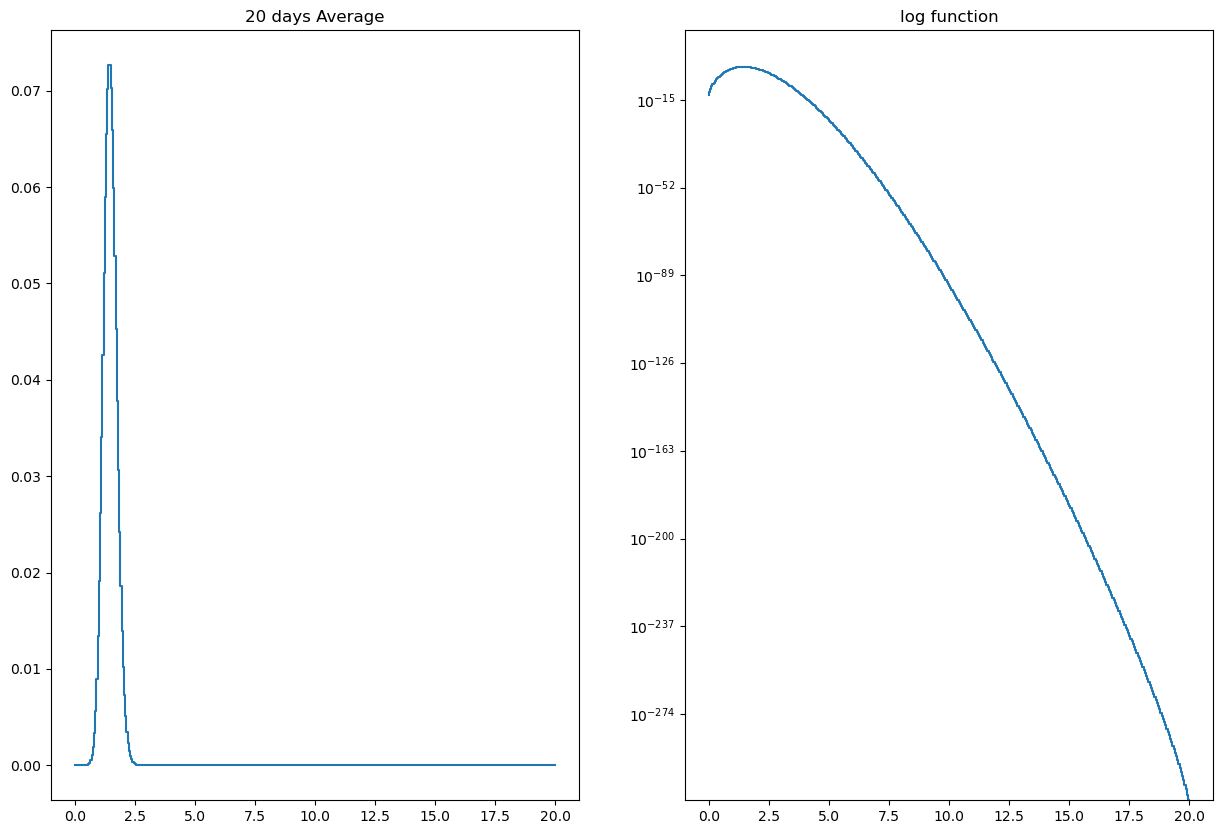

In [46]:
dist = [None] * 20
n = 20
mu = 1.5
loc = 0
r_value = list(range(n+1))
for i in range(20):
    #build in function for building a poisson dataset
    dist[i] = [stats.poisson.pmf(r, mu,loc) for r in r_value]
x = np.linspace(0,20,401)

p_con = np.convolve(dist[0], dist[1],'full')
for i in range(18):
    p_con = np.convolve(p_con, dist[i+2],'full')
fig, ax = plt.subplots(1,2)
ax[1].step(x,p_con)
plt.yscale('log')
ax[1].set_title('log function')
ax[0].step(x,p_con)
ax[0].set_title('20 days Average')

#### Q1.4
Pick some number of days N, and assume you saw Y*N gamma rays from your source. Calculate the 'sigma' of your observation.
 We picked 15 days as our N, and my Y is 19 

Text(0.5, 1.0, '15 days Average')

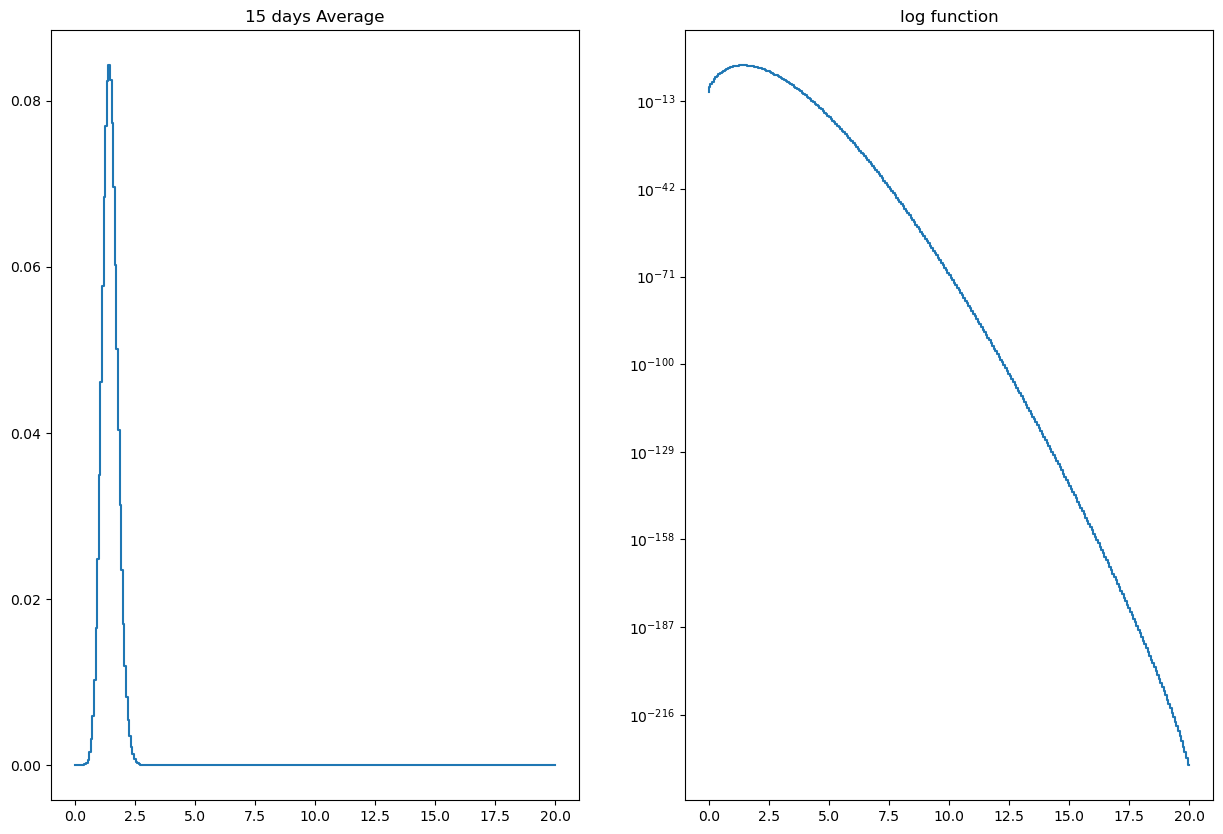

In [47]:
dist = [None] * 15
n = 20
mu = 1.5
loc = 0
r_value = list(range(n+1))
for i in range(15):
    #build in function for building a poisson dataset
    dist[i] = [stats.poisson.pmf(r, mu,loc) for r in r_value]


p_con = np.convolve(dist[0], dist[1],'full')

for i in range(13):
    p_con = np.convolve(p_con, dist[i+2],'full')
x = np.linspace(0,20,len(p_con))
fig, ax = plt.subplots(1,2)
ax[1].step(x,p_con)
plt.yscale('log')
ax[1].set_title('log function')
ax[0].step(x,p_con)
ax[0].set_title('15 days Average')

We can see N*Y gamma rays in total. Hence, the average gamma rays we can see per day is Y = 9. The math function is P = $\int_{9} f(x)\, dx = 1-F(9)$. However, we need to sum up all values that less than 15 since our data is discreted.

In [52]:
x_index = int(np.nonzero(x == 9)[0]) # return the index of x = 9
indices = range(x_index)
F_9 = np.sum(p_con[indices]) # sum all x less than 9
p_value = 1-F_9
print(p_value,F_9)

2.220446049250313e-16 0.9999999999999998


In [53]:
sigma = stats.norm.ppf(1-p_value)
sigma

8.125890664701908

#### Question 2

Pick a skewed continuous distribtuion, such as a Rayleigh, that describes your background over some observing interval.

1. Show how the distribution changes as you average over more observing intervals.

2. Discuss how the shape changes. Does it approach a Gaussian distribution? If yes, after how many intervals?

In [57]:
#rayleigh data
xl = np.linspace(0,20,500)
data_rayleigh = stats.rayleigh(scale=5, loc=0).pdf(xl)

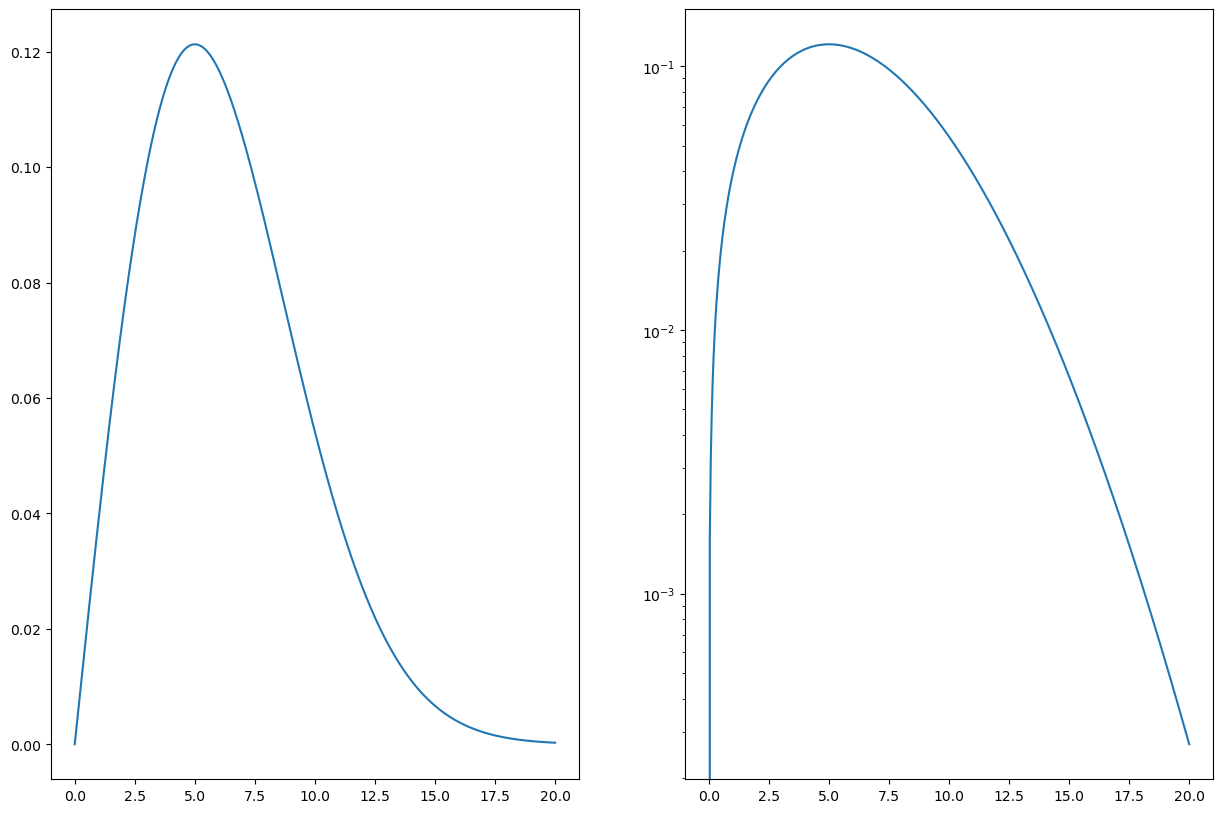

In [59]:
fig, ax = plt.subplots(1,2)
ax[0].plot(xl,data_rayleigh)
ax[1].plot(xl,data_rayleigh)
plt.yscale('log')

#### Q2.1
Show how the distribution changes as you average over more observing intervals.

In [60]:
ray_p_con = np.convolve(data_rayleigh,data_rayleigh,"full")

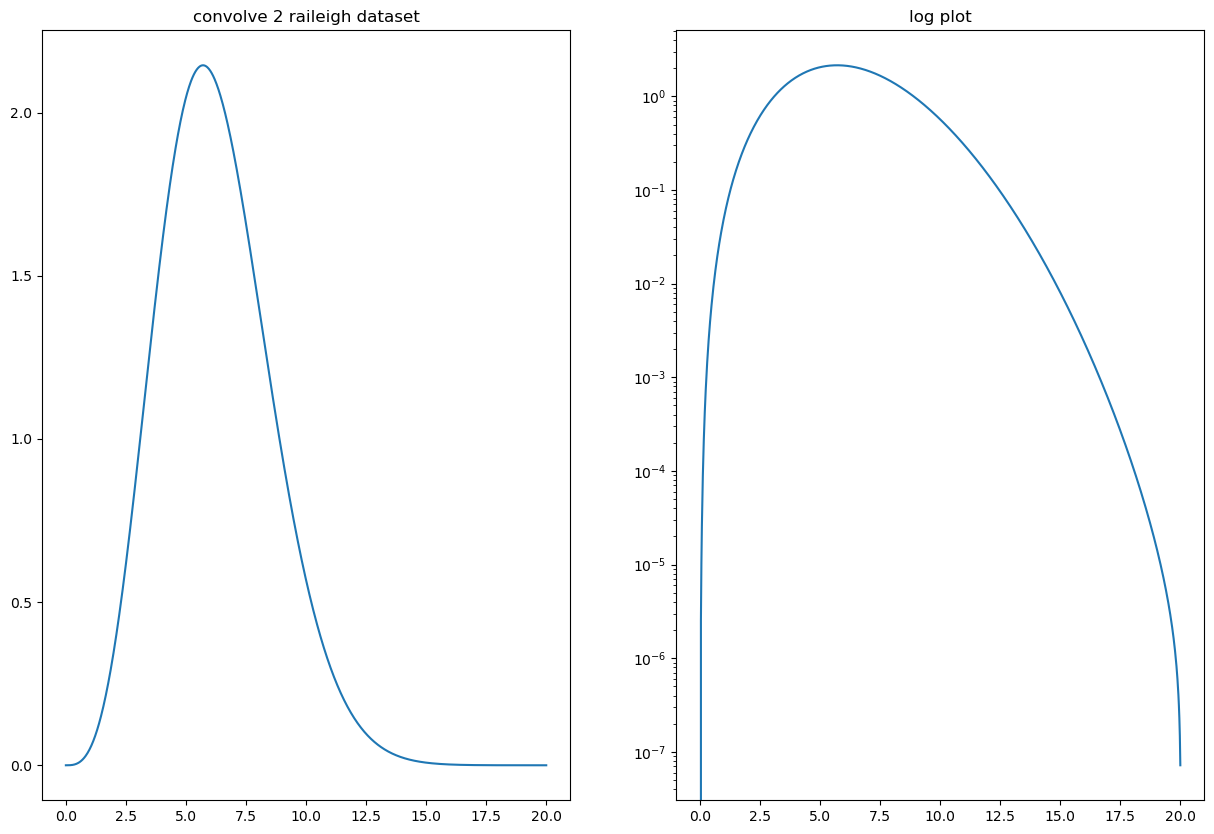

In [61]:
fig, ax = plt.subplots(1,2)

x = np.linspace(0,20,len(ray_p_con))
ax[0].plot(x,ray_p_con)
ax[1].plot(x,ray_p_con)
ax[0].set_title('convolve 2 raileigh dataset')
ax[1].set_title('log plot')
plt.yscale('log')

In [62]:
for i in range(3):
    ray_p_con = np.convolve(ray_p_con,data_rayleigh,'full')

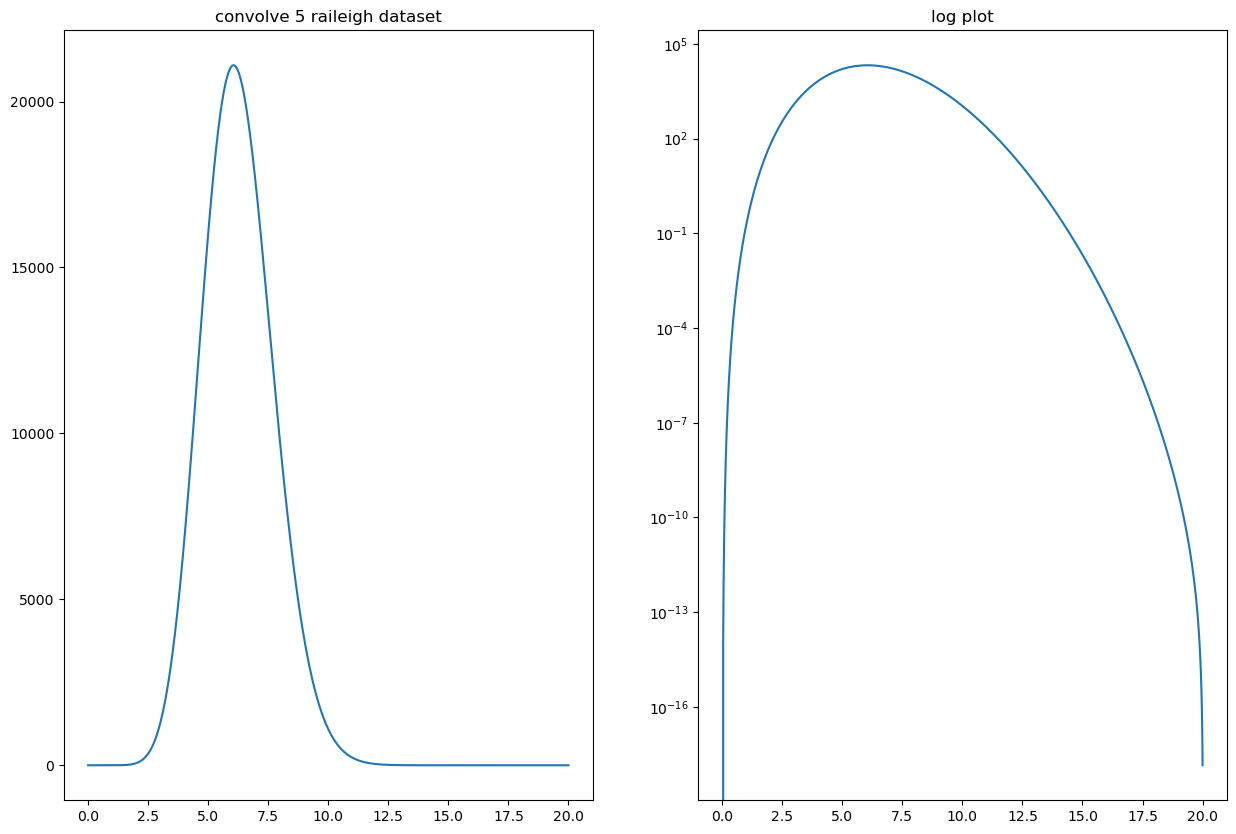

In [63]:
fig, ax = plt.subplots(1,2)

x = np.linspace(0,20,len(ray_p_con))
ax[0].plot(x,ray_p_con)
ax[1].plot(x,ray_p_con)
ax[0].set_title('convolve 5 raileigh dataset')
ax[1].set_title('log plot')
plt.yscale('log')

In [64]:
for i in range(15):
    ray_p_con = np.convolve(ray_p_con,data_rayleigh,'full')

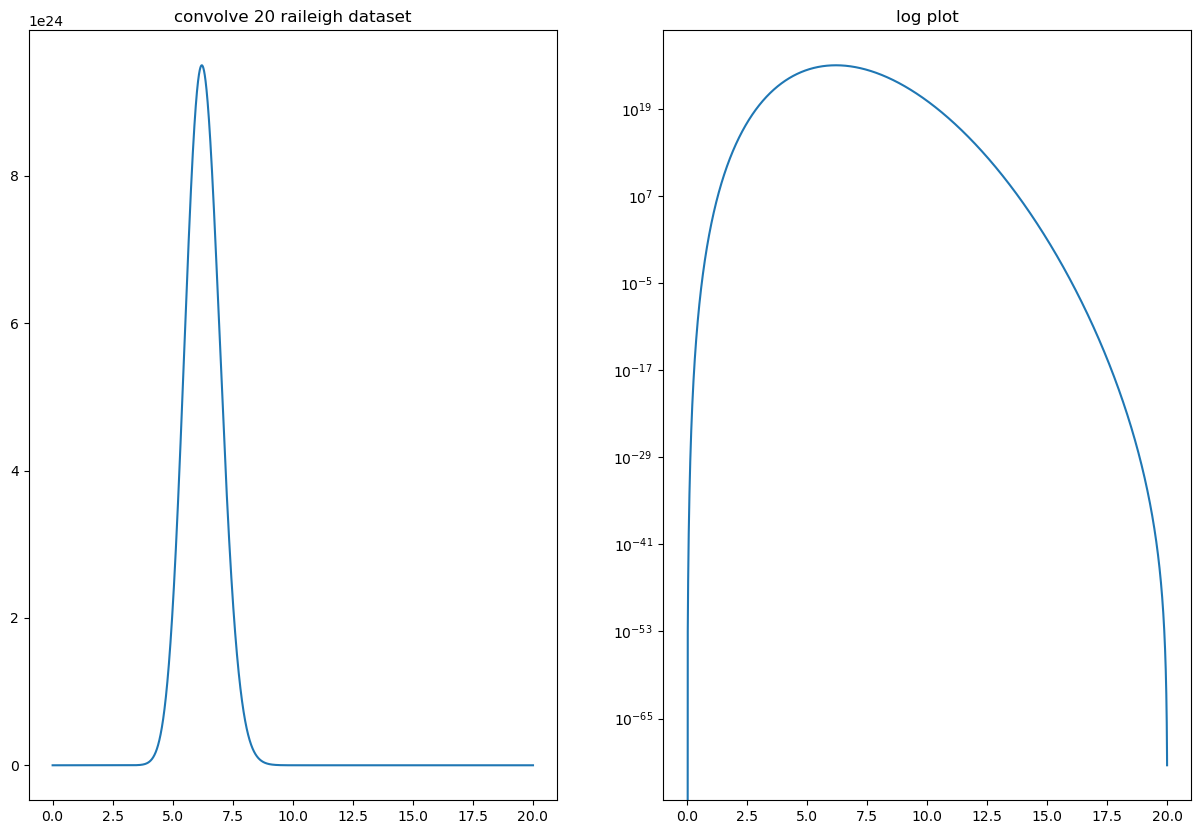

In [65]:
fig, ax = plt.subplots(1,2)

x = np.linspace(0,20,len(ray_p_con))
ax[0].plot(x,ray_p_con)
ax[1].plot(x,ray_p_con)
ax[0].set_title('convolve 20 raileigh dataset')
ax[1].set_title('log plot')
plt.yscale('log')

In [66]:
for i in range(50):
    ray_p_con = np.convolve(ray_p_con,data_rayleigh,'full')

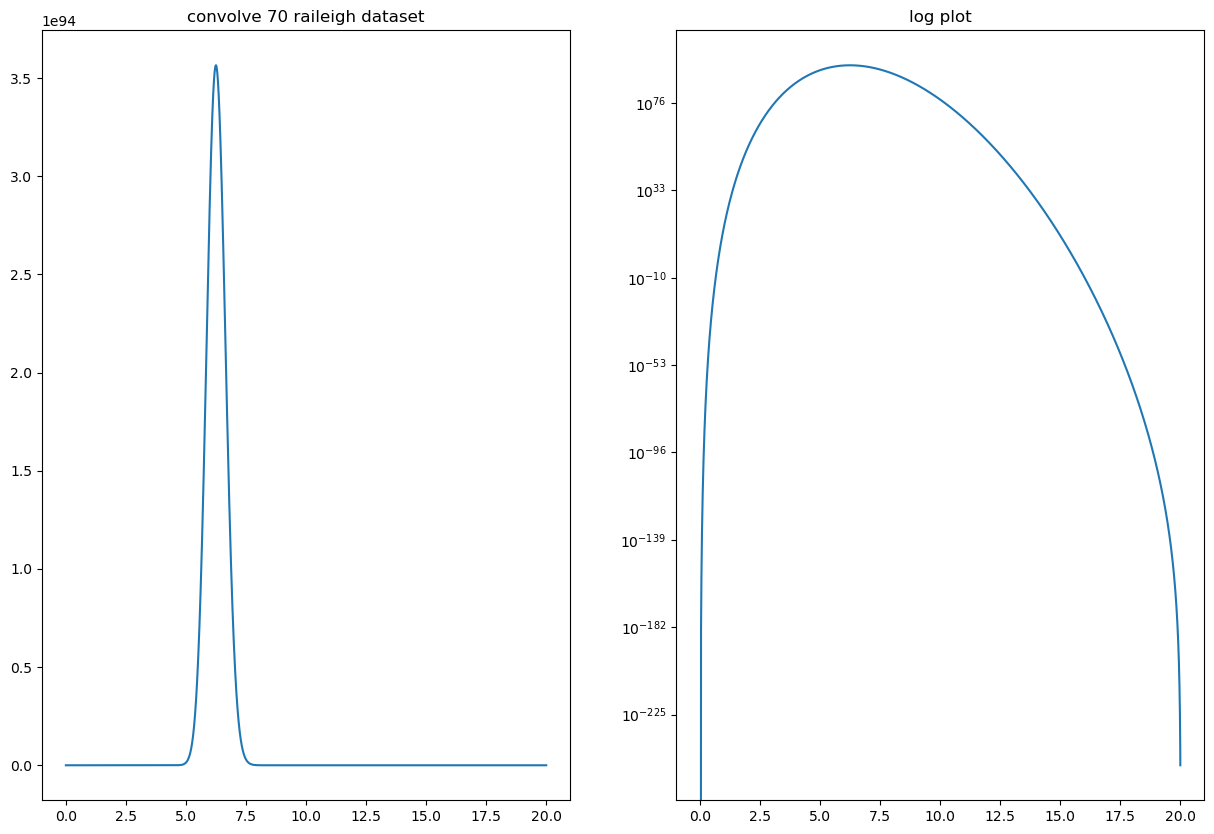

In [67]:
fig, ax = plt.subplots(1,2)

x = np.linspace(0,20,len(ray_p_con))
ax[0].plot(x,ray_p_con)
ax[1].plot(x,ray_p_con)
ax[0].set_title('convolve 70 raileigh dataset')
ax[1].set_title('log plot')
plt.yscale('log')

#### Question 3
The discovery of optical/infra-red counterparts of Neutron star mergers initially detected with gravity-waves is one of the great discoverys in the last few years (wikipedia, scientific paper), and has ushered in the age of "multi-messenger astrophysics." The science that can be done by matching a gravity-wave signal (directly measures the mass of the neutron stars and their distance) with the optical emisson (redshift, nuclear astrophysics of the resulting explosion) is staggering. Lots of science from how the heaviest elements are formed to constraints on Dark Energy.

We're going to explore one of the analysis questions that comes up when looking for the optical counterparts (a new optical source) of a gravity wave signal. For this problem let's assume that we are using an optical telescope with a thermal noise background from the CCD (dark current, particularly an issue with older CCDs and/or infra-red CCDs). After flat-fielding, the background appears as a zero-mean Gaussian with constant width over the image.


#### Version 1
You have an alert from LIGO that is also seen in with the X-ray/ultra-violet satellite SWIFT. SWIFT gives you a very precise location, so you take an image of that part of the sky. But because of SWIFT's accuracy, you know which pixel in your image to look for a counterpart in.

1. From looking at all the other pixels in your image, you can measure the width of the background Gaussian distribution X (pick something). Assuming you see a signal of strength Y (pick a floating-point number; optical CCDs are not sensitive enough to count photons so the readings are floating point brightnesses, not integer photons). Calculate the significance of your detection. Can you claim a discovery (traditionally 5-sigma or more)?

In [3]:
width = 3 # x = 3
str_y = 12.8 # signal of strength Y = 12.8
# calculate p value by using cdf
p_value = 1- stats.norm.cdf(str_y, loc = 0, scale = width)
p_value

9.920763885507e-06

In [70]:
# finding sigma by using ppf
sigma = abs(stats.norm.ppf(p_value))
sigma

4.26666666666774

#### Version 2
You have an alert from LIGO, but no associated detection from SWIFT. This could be because it is a black hole-black hole merger, a black hole-neutron star merger (neither seem to emit X-rays or UV light), or it could because SWIFT was indisposed at the time (wrong side of the earth in its orbit). Whatever the cause, you know what region of the sky to look in, but not which pixel.

2. If you have to look for a signal in 10k pixels, what is the probability distribution of your background? (Clearly state the statistical question, then turn that into math using your background distribution from part 1 of this problem.)

3. Taking your brightest candidate signal from the region (assume it has the same signal as in part 1), calculate the significance of your detection.

#### Q3.2
 If you have to look for a signal in 10k pixels, what is the probability distribution of your background? (Clearly state the statistical question, then turn that into math using your background distribution from part 1 of this problem.)

Text(0, 0.5, 'Probability')

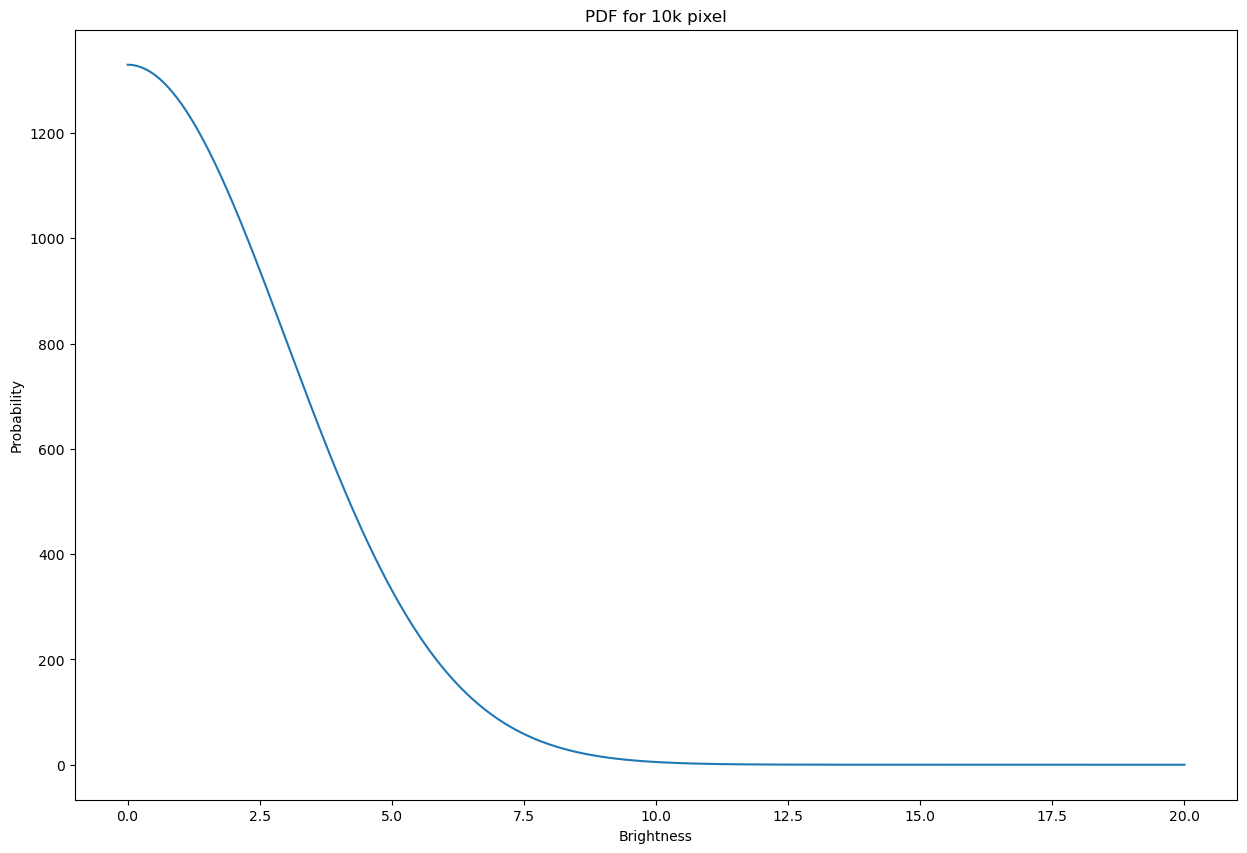

In [7]:
# From our lecture, we can know that we can multiply 10k to a backgrounf distribution 
#which would only change its y value to be higher, that's the way how combine background distribution.
dist = stats.norm(scale = width)
x = np.linspace(0,20,1000)
plt.plot(x, dist.pdf(x)*10000)
plt.title("PDF for 10k pixel")
plt.xlabel('Brightness')
plt.ylabel("Probability")

#### Q3.3
Taking your brightest candidate signal from the region (assume it has the same signal as in part 1), calculate the significance of your detection.

In [74]:
#same as part 1, thus, it is 12.8
p_value = (1- stats.norm.cdf(str_y,loc = 0, scale = width)) * 10000
sigma = abs(stats.norm.ppf(1-p_value))
sigma

1.286079614779199

#### Question 4
The statistical issue we were exploring in the previous problem is called a trials factor (sometimes known as a look-elsewhere effect). This is an important effect, as if you search through a million locations, you would expect to se ~1 one in a million event. However, it is also often over estimated how big an impact this makes on the sensitivity of a search. So in this part of the lab we are going to invert the problem.

Let us again assume we have a Gaussian background (same parameters as Problem 3).

1. Calculate the signal required for a 5-sigma detection in Version 1

2. Calculate the signal required for a 5-sigma detection in Version 2

3. Discuss how much brighter the signal must be for discoverey if you have a trials factor of 10k. Looking at your probability distributions, explain why the sensitivity penalty due to a trials factor is so low.

4. If you changed the trials factor significantly (orders of magnitude), how large is the effect on your 5-sigma sensitivity threshold?

#### Q4.1
Calculate the signal required for a 5-sigma detection in Version 1

In [4]:
prob5sigma = 1/3.5e6
det = stats.norm.ppf(1- prob5sigma, loc = 0, scale = width)
det

15.001894304791143

#### Q4.2
Calculate the signal required for a 5-sigma detection in Version 2

In [5]:
prob5sigma = 1/3.5e6
det_2 = stats.norm.ppf(1- prob5sigma/10000, loc = 0, scale = width)
det_2

19.65307918215476

#### Q4.3
Discuss how much brighter the signal must be for discoverey if you have a trials factor of 10k. Looking at your probability distributions, explain why the sensitivity penalty due to a trials factor is so low.

In [6]:
det_2/det

1.3100398378275582

#### Q4.4
If you changed the trials factor significantly (orders of magnitude), how large is the effect on your 5-sigma sensitivity threshold?

Text(0.5, 1.0, '5 sigma threshold vs trials')

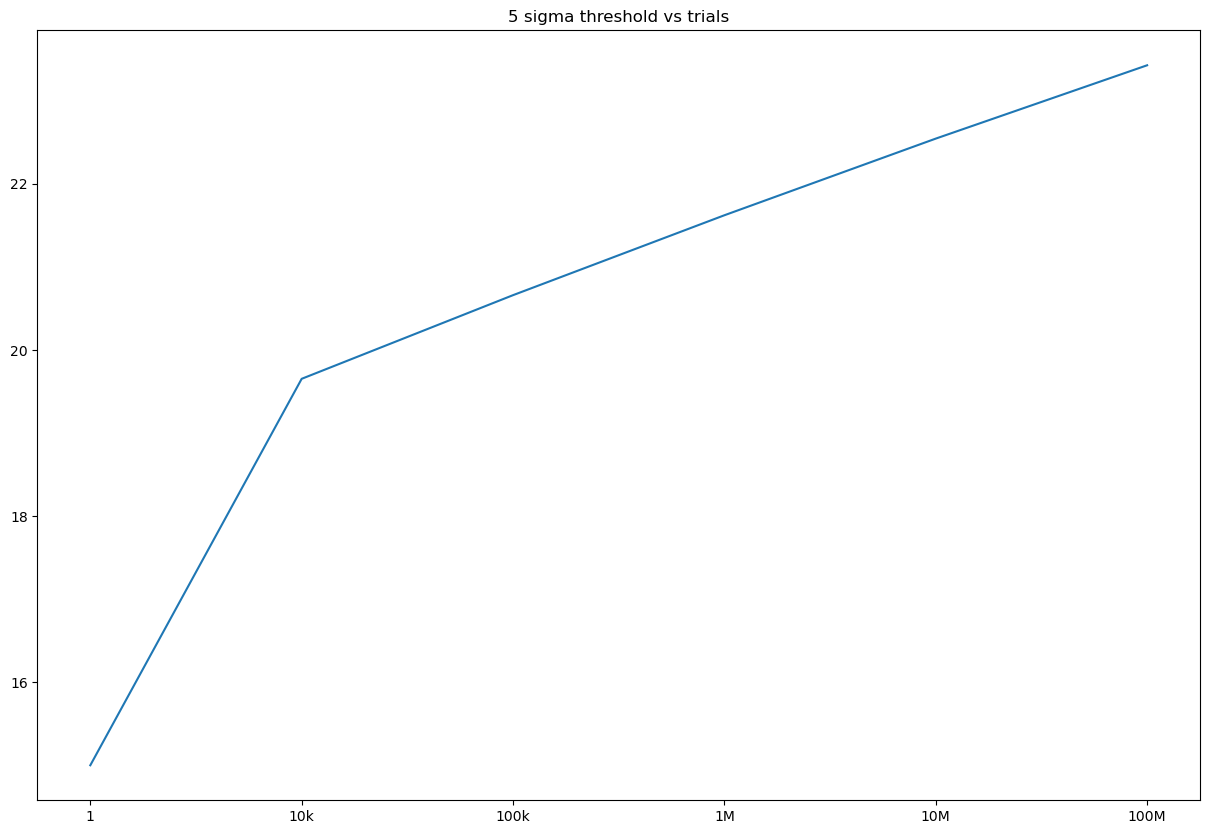

In [8]:
# trying for several different factors
factor = [det,det_2]
factor.append(stats.norm.ppf(1- prob5sigma/100000 , scale = width)) #100k
factor.append(stats.norm.ppf(1- prob5sigma/1000000 , scale = width)) #1M
factor.append(stats.norm.ppf(1- prob5sigma/10000000 , scale = width)) #10M
factor.append(stats.norm.ppf(1- prob5sigma/100000000 , scale = width)) #100M
x = ['1','10k','100k','1M','10M','100M']

plt.plot(x,factor)
plt.title('5 sigma threshold vs trials')